# Plotting in Matplotlib: practice exercises

We will be using real-life data today to add figures to a figureless paper on theory of mind in bipolar disorder. The dataset itself + a short description of it is available at https://www.kaggle.com/mercheovejero/theory-of-mind-in-remitted-bipolar-disorder.

The journal article and a dataset with some additional info can be found here: https://doi.org/10.1371/journal.pone.0222112



## Task 0: Arrange your data frame:

Load the data from the file available on Kaggle and the data from the PLOS ONE website. Integrate the additional data from the PLOS ONE dataset into the Kaggle data frame.

*Hint 1*: mind the separators; think of using a lambda function.

*Hint 2*: The order of the rows in the two files is identical!

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df_kaggle = pd.read_csv('Database MiniPONS.csv', delimiter = ';')
df_plosone = pd.read_csv('journal.pone.0222112.s001.csv', delimiter = ';')

In [3]:
df_plosone.head()

,Sexo,Grupo,Tipobipolar,Edad,PONS99,PONS_CAUP,PONS_CCOM,PONS_CVCA,PONS_CVCU,PONS_VPOS,PONS_VNEG,PONS_DDOM,PONS_DSUM
0,Mujer,Bipolar,TB I,47,40,9,11,9,11,18,22,23,17
1,Mujer,Bipolar,TB I,49,49,13,13,11,12,24,25,24,25
2,Hombre,Bipolar,TB I,45,43,9,11,13,10,21,22,24,19
3,Mujer,Bipolar,TB I,53,44,10,10,12,12,25,19,24,20
4,Hombre,Bipolar,TB II,50,50,14,13,11,12,23,27,23,27


In [4]:
df_kaggle.head()

,Group,Type,Age,Right_answers,Audio_prosody,Combined_channel,Face_video,Body_video,Positive_valence,Negative_valence,Dominant,Submissive
0,Bipolar,BD I,47,40,9,11,9,11,18,22,23,17
1,Bipolar,BD I,49,49,13,13,11,12,24,25,24,25
2,Bipolar,BD I,45,43,9,11,13,10,21,22,24,19
3,Bipolar,BD I,53,44,10,10,12,12,25,19,24,20
4,Bipolar,BD II,50,50,14,13,11,12,23,27,23,27


Column *Sexo* is missing from df_kaggle, so we're going to:
- add it to df_kaggle from df_plosone;
- translate 'Mujer' ('Woman') and 'Hombre' ('Man') to English.

For translating, you can use a lambda function or a pandas .replace method (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html). But let's practice lambda functions.

You have 2 options for applying a lambda function on a column in a dataframe:

In [5]:
# option 1: df.column_name.apply(lambda_function_applied_on_single_cells_in_column)
#df_kaggle['Gender'] = df_plosone.Sexo.apply(lambda x: 'W' if x == 'Mujer' else 'M')
# option 2: df.apply(lambda_function_applied_on_rows_in_df, axis=1)
df_kaggle['Gender'] = df_plosone.apply(lambda row: 'W' if row.Sexo == 'Mujer' else 'M', axis = 1)
df_kaggle.head()

,Group,Type,Age,Right_answers,Audio_prosody,Combined_channel,Face_video,Body_video,Positive_valence,Negative_valence,Dominant,Submissive,Gender
0,Bipolar,BD I,47,40,9,11,9,11,18,22,23,17,W
1,Bipolar,BD I,49,49,13,13,11,12,24,25,24,25,W
2,Bipolar,BD I,45,43,9,11,13,10,21,22,24,19,M
3,Bipolar,BD I,53,44,10,10,12,12,25,19,24,20,W
4,Bipolar,BD II,50,50,14,13,11,12,23,27,23,27,M


In [6]:
df = df_kaggle.copy()

## Task 1. Print out summary statistics:
- Across groups: means and SDs, etc. Just to know what sort of values we're working with.
- Per group. Do it different ways (try .groupby, .aggregate, use a for loop)
- Save as .csv (.to_csv)

### ~ Summary statistics across groups

In [7]:
df.describe().round(1)
# .round(1) just rounds the values in the .describe() output to 1 decimal point but it's optional

,Age,Right_answers,Audio_prosody,Combined_channel,Face_video,Body_video,Positive_valence,Negative_valence,Dominant,Submissive
count,277.0,277.0,277.0,277.0,277.0,277.0,277.0,277.0,277.0,277.0
mean,48.7,47.1,11.4,12.3,11.8,11.5,23.6,23.5,23.5,23.6
std,12.5,5.2,2.1,1.9,1.7,1.9,3.2,3.1,3.1,3.0
min,21.0,28.0,3.0,6.0,8.0,5.0,13.0,10.0,12.0,13.0
25%,39.0,44.0,10.0,11.0,11.0,10.0,22.0,22.0,22.0,22.0
50%,50.0,47.0,12.0,12.0,12.0,12.0,24.0,24.0,24.0,24.0
75%,58.0,51.0,13.0,14.0,13.0,13.0,26.0,26.0,26.0,26.0
max,78.0,58.0,16.0,16.0,15.0,16.0,30.0,30.0,31.0,30.0


You can always print descriptives separately. Here are examples for means and standard deviations, for the rest - check pandas reference page: https://pandas.pydata.org/docs/reference/frame.html

In [8]:
df.mean()

Age                 48.718412
Right_answers       47.079422
Audio_prosody       11.425993
Combined_channel    12.339350
Face_video          11.794224
Body_video          11.519856
Positive_valence    23.555957
Negative_valence    23.523466
Dominant            23.454874
Submissive          23.624549
dtype: float64

In [9]:
df.std()

Age                 12.452524
Right_answers        5.231680
Audio_prosody        2.122800
Combined_channel     1.931903
Face_video           1.693199
Body_video           1.912147
Positive_valence     3.215893
Negative_valence     3.132981
Dominant             3.125796
Submissive           3.033003
dtype: float64

### ~ Summary statistics by group

In [10]:
# Option 1:
df.groupby('Type').describe()

Age                                                       \
         count       mean        std   min    25%   50%   75%   max   
Type                                                                  
BD I      70.0  44.485714  11.493846  21.0  36.25  45.0  53.0  69.0   
BD II     49.0  49.877551  11.466678  25.0  41.00  51.0  58.0  73.0   
Control  119.0  46.075630  10.802667  22.0  37.50  48.0  54.0  67.0   
UD        39.0  62.923077   9.707253  35.0  57.00  66.0  70.0  78.0   

        Right_answers             ... Dominant       Submissive             \
                count       mean  ...      75%   max      count       mean   
Type                              ...                                        
BD I             70.0  45.142857  ...     25.0  29.0       70.0  22.400000   
BD II            49.0  45.653061  ...     24.0  29.0       49.0  23.081633   
Control         119.0  50.235294  ...     27.0  31.0      119.0  25.361345   
UD               39.0  42.717949  ...     23.0  29.0       39.0  21.205128   

                                                  
              std   min   25%   50%    75%   max  
Type                                              
BD I     2.704800  15.0  21.0  22.5  24.75  28.0  
BD II    2.714442  18.0  21.0  23.0  25.00  28.0  
Control  2.208347  17.0  24.0  25.0  27.00  30.0  
UD       3.237766  13.0  19.0  22.0  23.50  29.0  

[4 rows x 80 columns]

In [11]:
# Option 2: for loop
for iType in pd.unique(df.Type):
    print('\n~~~ ' + iType + ' summary statistics ~~~') # '\n' means 'enter' (= go to a new line) and '~~~' will just print '~~~' to make the output easier to read
    print(df[df.Type == iType].describe(percentiles = []).round(1)) # percentiles = [] removes the 25% and the 75% percentiles from the .describe() output to increase readability


~~~ BD I summary statistics ~~~
        Age  Right_answers  Audio_prosody  Combined_channel  Face_video  \
count  70.0           70.0           70.0              70.0        70.0   
mean   44.5           45.1           10.8              12.0        11.3   
std    11.5            4.9            2.1               1.6         1.7   
min    21.0           28.0            3.0               8.0         8.0   
50%    45.0           45.0           11.0              12.0        11.0   
max    69.0           56.0           14.0              16.0        15.0   

       Body_video  Positive_valence  Negative_valence  Dominant  Submissive  
count        70.0              70.0              70.0      70.0        70.0  
mean         11.1              22.6              22.6      22.7        22.4  
std           1.8               3.2               2.9       3.1         2.7  
min           6.0              14.0              13.0      12.0        15.0  
50%          11.0              23.0              23

Let's go over this piece of code.

It is here for you to practice for loops.

You can try looping through unique levels of variable Type.

*NB*: if you work with categorical variables (e.g., groups of participants, experimental conditions, types of proteins), you'll likely have to use pd.unique or an equivalent method, so I recommend going over this piece of code carefully.

df.Type is a column, it has the length of your dataset:

In [12]:
df.Type.head()

0     BD I
1     BD I
2     BD I
3     BD I
4    BD II
Name: Type, dtype: object

In [13]:
len(df.Type)

277

If you want to do certain operations on separate levels of the variable 'Type', you can loop through the levels. in our case, your for loop will have 4 iterations: once for every level of type ('BD I', 'BD II', 'Control', 'UD').

The syntax of the for loop requires for you to have a list of values that the iterator takes on during every iteration of the loop. In our case, this list is ['BD I', 'BD II', 'UD', 'Control']. We don't want to hard-code it but we want to make python output it for us.

pd.unique will give you the list of unique (non-repeating) values in the Type column:

In [14]:
pd.unique(df.Type)

array(['BD I', 'BD II', 'Control', 'UD'], dtype=object)

In [15]:
len(pd.unique(df.Type))

4

How can we use our iterator inside the loop if during every iteration of the loop it takes on one string value from the following list ['BD I', 'BD II', 'Control', 'UD']?

We can use it to subset our dataframe:

In [16]:
iType = 'BD I' # this is done automatically on the first iteration of the loop
df_with_only_BD_I = df[df.Type == iType]

Now you have a new dataframe with all columns of the original dataframe but only for BD I.
You can use .describe or any other methods on it: print descriptive statistics, plot values specific to BD I etc.
You can also do the same for the other groups of participants.

In [17]:
print(df_with_only_BD_I.describe().round(1))

        Age  Right_answers  Audio_prosody  Combined_channel  Face_video  \
count  70.0           70.0           70.0              70.0        70.0   
mean   44.5           45.1           10.8              12.0        11.3   
std    11.5            4.9            2.1               1.6         1.7   
min    21.0           28.0            3.0               8.0         8.0   
25%    36.2           42.2            9.2              11.0        10.0   
50%    45.0           45.0           11.0              12.0        11.0   
75%    53.0           48.0           12.0              13.0        12.0   
max    69.0           56.0           14.0              16.0        15.0   

       Body_video  Positive_valence  Negative_valence  Dominant  Submissive  
count        70.0              70.0              70.0      70.0        70.0  
mean         11.1              22.6              22.6      22.7        22.4  
std           1.8               3.2               2.9       3.1         2.7  
min         

In [18]:
#second iteration of the loop will do this:
iType = 'BD II' 
df_with_only_BD_II = df[df.Type == iType]
#print(df_with_only_BD_II.describe().round(1))

In [19]:
#third iteration of the loop will do this:
iType = 'Control' 
df_with_only_Control = df[df.Type == iType]
#print(df_with_only_Control.describe().round(1))

In [20]:
#fourth iteration of the loop will do this:
iType = 'UD' 
df_with_only_UD = df[df.Type == iType]
#print(df_with_only_UD.describe().round(1))

Instead of writing this code 4 times, once for every group, we can use a for loop:

In [21]:
for iType in pd.unique(df.Type):
    print(iType + ' summary statistics') # prints "GROUP_LABEL summary statistics" for us to know which group's statistics are printed
    print(df[df.Type == iType].describe().round(1)) # prints descriptive statistics for one group rounded to 1 decimal point

BD I summary statistics
        Age  Right_answers  Audio_prosody  Combined_channel  Face_video  \
count  70.0           70.0           70.0              70.0        70.0   
mean   44.5           45.1           10.8              12.0        11.3   
std    11.5            4.9            2.1               1.6         1.7   
min    21.0           28.0            3.0               8.0         8.0   
25%    36.2           42.2            9.2              11.0        10.0   
50%    45.0           45.0           11.0              12.0        11.0   
75%    53.0           48.0           12.0              13.0        12.0   
max    69.0           56.0           14.0              16.0        15.0   

       Body_video  Positive_valence  Negative_valence  Dominant  Submissive  
count        70.0              70.0              70.0      70.0        70.0  
mean         11.1              22.6              22.6      22.7        22.4  
std           1.8               3.2               2.9       3.1   

You can edit this loop in any way you like, so that the output fits your needs and likes. Here's my version:

In [22]:
for iType in pd.unique(df.Type):
    print('\n~~~ ' + iType + ' summary statistics ~~~') # '\n' means 'enter' (= go to a new line) and '~~~' will just print '~~~' to make the output easier to read
    print(df[df.Type == iType].describe(percentiles = []).round(1)) # percentiles = [] removes the 25% and the 75% percentiles from the .describe() output to increase readability


~~~ BD I summary statistics ~~~
        Age  Right_answers  Audio_prosody  Combined_channel  Face_video  \
count  70.0           70.0           70.0              70.0        70.0   
mean   44.5           45.1           10.8              12.0        11.3   
std    11.5            4.9            2.1               1.6         1.7   
min    21.0           28.0            3.0               8.0         8.0   
50%    45.0           45.0           11.0              12.0        11.0   
max    69.0           56.0           14.0              16.0        15.0   

       Body_video  Positive_valence  Negative_valence  Dominant  Submissive  
count        70.0              70.0              70.0      70.0        70.0  
mean         11.1              22.6              22.6      22.7        22.4  
std           1.8               3.2               2.9       3.1         2.7  
min           6.0              14.0              13.0      12.0        15.0  
50%          11.0              23.0              23

In [23]:
# Option 3: if you want to print descriptives only for specific columns in your dataframe
df.groupby('Type').Age.describe() # calculates only the age descriptives per group

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
BD I,70.0,44.485714,11.493846,21.0,36.25,45.0,53.0,69.0
BD II,49.0,49.877551,11.466678,25.0,41.00,51.0,58.0,73.0
Control,119.0,46.075630,10.802667,22.0,37.50,48.0,54.0,67.0
UD,39.0,62.923077,9.707253,35.0,57.00,66.0,70.0,78.0


In [24]:
# Option 4: print means (or any other statistic separately)
df.groupby('Type').mean()

,Age,Right_answers,Audio_prosody,Combined_channel,Face_video,Body_video,Positive_valence,Negative_valence,Dominant,Submissive
Type,,,,,,,,,,
BD I,44.485714,45.142857,10.757143,12.042857,11.257143,11.085714,22.585714,22.557143,22.742857,22.400000
BD II,49.877551,45.653061,11.285714,11.795918,11.408163,11.163265,22.857143,22.795918,22.571429,23.081633
Control,46.075630,50.235294,12.226891,13.176471,12.529412,12.302521,25.151261,25.084034,24.873950,25.361345
UD,62.923077,42.717949,10.358974,11.000000,11.000000,10.358974,21.307692,21.410256,21.512821,21.205128


In [25]:
# Option 5: print multiple statistics of choice
df.groupby('Type').agg([np.mean, np.std]).round(1)

Age       Right_answers      Audio_prosody      Combined_channel  \
         mean   std          mean  std          mean  std             mean   
Type                                                                         
BD I     44.5  11.5          45.1  4.9          10.8  2.1             12.0   
BD II    49.9  11.5          45.7  4.7          11.3  2.0             11.8   
Control  46.1  10.8          50.2  3.7          12.2  2.0             13.2   
UD       62.9   9.7          42.7  5.0          10.4  2.0             11.0   

             Face_video      Body_video      Positive_valence       \
         std       mean  std       mean  std             mean  std   
Type                                                                 
BD I     1.6       11.3  1.7       11.1  1.8             22.6  3.2   
BD II    1.9       11.4  1.6       11.2  1.7             22.9  2.9   
Control  1.6       12.5  1.5       12.3  1.6             25.2  2.5   
UD       2.2       11.0  1.6       10.4  2.3             21.3  3.3   

        Negative_valence      Dominant      Submissive       
                    mean  std     mean  std       mean  std  
Type                                                         
BD I                22.6  2.9     22.7  3.1       22.4  2.7  
BD II               22.8  3.1     22.6  3.2       23.1  2.7  
Control             25.1  2.5     24.9  2.5       25.4  2.2  
UD                  21.4  3.2     21.5  2.9       21.2  3.2

### ~ Save output as .csv

In [26]:
# For example:
summary = df.describe()
summary.to_csv('summary.csv')

## Task 2: Visualize participants' age:
- What's the best way to plot the age distribution across all participants?
- What's the best way of seeing if the groups are comparable in age?
- Add titles, axis labels, make figures consistent, use subplots if needed
- Save results as .pdf

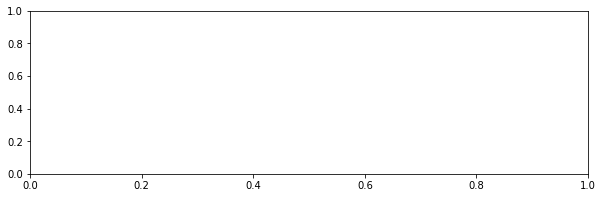

In [27]:
fig, ax = plt.subplots(figsize = (10,3)) # this line assigns a name of choice to your figure (fig) and axis objects (ax)

The above line is good practice because it assigns a figure object and an axis object in one step. Here are some more comments on this:
https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python

You can do many things working with just your 'current figure' (for example, you can use plt.xticks instead of plt.set_xticks). But some things you can only do using an axis object, so it's good to create it right away.

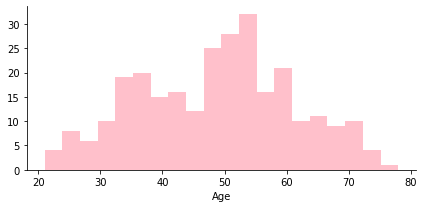

In [28]:
fig, ax = plt.subplots(figsize = (6,3)) # this line assigns a name of choice to your figure (fig) and axis objects (ax)
plt.hist(df.Age, bins = 20, color = 'pink', label = 'Age')
plt.xlabel('Age')
# now this you can't do without an axis object:
ax.spines['right'].set_visible(False) # removes axis on the right
ax.spines['top'].set_visible(False) # removes axis on the top
plt.tight_layout()
plt.savefig('Age_across_groups.pdf')
plt.show()

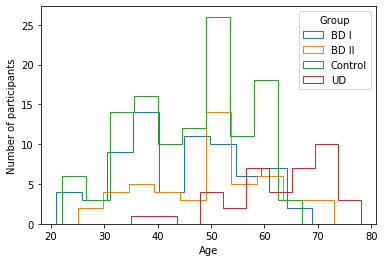

In [29]:
# loop through the levels of your variable using .unique

for iType in pd.unique(df.Type):
    plt.hist(df[df.Type == iType].Age, histtype = 'step', label = iType)

plt.legend(title = 'Group')
plt.xlabel('Age')
plt.ylabel('Number of participants')

plt.show()

The following visualizations are more complex that what you learned on Codecademy but will demonstrate what we can do in matplotlib and how.
I recommend going through this code slowly and trying write your own version of it in parallel.

In [30]:
# plot boxplots from a list of arrays;
# practice again: loop through the levels of your variable using .unique (same as pd.unique)
series_values = []
for iType in df.Type.unique():
    series_values.append(df[df.Type==iType].Age.values) # series_values becomes a list of arrays

In [31]:
series_values

[array([47, 49, 45, 53, 31, 45, 48, 57, 55, 56, 60, 39, 53, 45, 60, 37, 65,
        47, 61, 46, 41, 40, 48, 57, 36, 21, 41, 57, 35, 35, 51, 50, 53, 46,
        53, 38, 42, 63, 33, 39, 23, 37, 54, 41, 40, 32, 38, 49, 29, 32, 60,
        24, 29, 39, 51, 69, 29, 53, 63, 32, 38, 54, 37, 39, 24, 64, 55, 36,
        31, 34]),
 array([50, 50, 60, 55, 41, 48, 37, 59, 33, 54, 52, 53, 54, 52, 73, 48, 49,
        48, 60, 59, 62, 52, 67, 39, 56, 69, 70, 51, 49, 36, 44, 39, 50, 58,
        50, 65, 33, 42, 51, 33, 52, 34, 66, 25, 26, 41, 53, 61, 35]),
 array([47, 49, 45, 53, 50, 31, 45, 48, 57, 50, 55, 60, 55, 41, 56, 60, 48,
        37, 39, 59, 33, 53, 54, 45, 52, 60, 53, 37, 54, 52, 60, 62, 47, 61,
        48, 49, 48, 50, 45, 41, 49, 48, 58, 36, 59, 61, 22, 42, 41, 53, 67,
        35, 35, 52, 37, 50, 53, 46, 53, 56, 59, 59, 51, 38, 49, 39, 42, 62,
        33, 39, 44, 39, 23, 37, 54, 41, 50, 58, 50, 40, 60, 32, 38, 33, 42,
        51, 49, 33, 29, 52, 34, 32, 59, 24, 29, 39, 66, 51, 65, 29, 53, 60,


In [32]:
len(series_values) # one array per Type

4

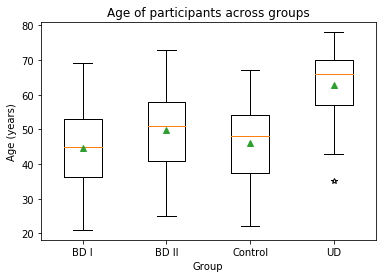

In [33]:
ax = plt.subplot() # creates axis object but no figure object
plt.boxplot(series_values, sym = '*', showmeans = True)
plt.xlabel('Group')
plt.ylabel('Age (years)')
plt.title('Age of participants across groups')
ax.set_xticklabels(df.Type.unique())

plt.show()

## Task 3: Visualize participants' gender:
- how would you best visualize a categorical variable?
- try to reproduce the following figure:

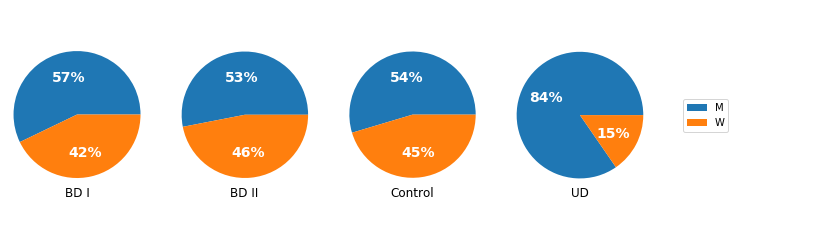

In [34]:
# new-ish things to learn: adding subplots in a loop; adding one legend for all subplots; looping with multiple identifiers
# practice again: looping through levels of your variable using .unique, plotting basics
fig, axs = plt.subplots(1,1+len(df.Type.unique())) # axs is a list of subplots

#print(type(axs))
#print(axs)

for iType, iPlot in zip(df.Type.unique(), range(len(df.Type.unique()))):
    gender_count_list = []
    gender_count_list.append(df[(df.Gender == 'W') & (df.Type == iType)].Gender.count())
    gender_count_list.append(df[(df.Gender == 'M') & (df.Type == iType)].Gender.count())
    # note how using _ is a pythonic way of saying you won't use this variable further
    handles, _, _ =  axs[iPlot].pie(gender_count_list, autopct = '%d%%', textprops=dict(color="w", fontweight = 'bold', fontsize = 14))
    axs[iPlot].axis('equal')
    axs[iPlot].set_title(iType, y=0.1)
    if iPlot == len(df.Type.unique())-1:
        axs[iPlot+1].legend(handles, ['M', 'W'], loc='center left') # you're adding an additional subplot
        axs[iPlot+1].axis('off') # but you only want the legend, so we're removing the rest
        plt.subplots_adjust(right=2)

plt.show()
fig.savefig('gender.png', bbox_inches = 'tight')

## Task 4: Visualize the MiniPONS results:

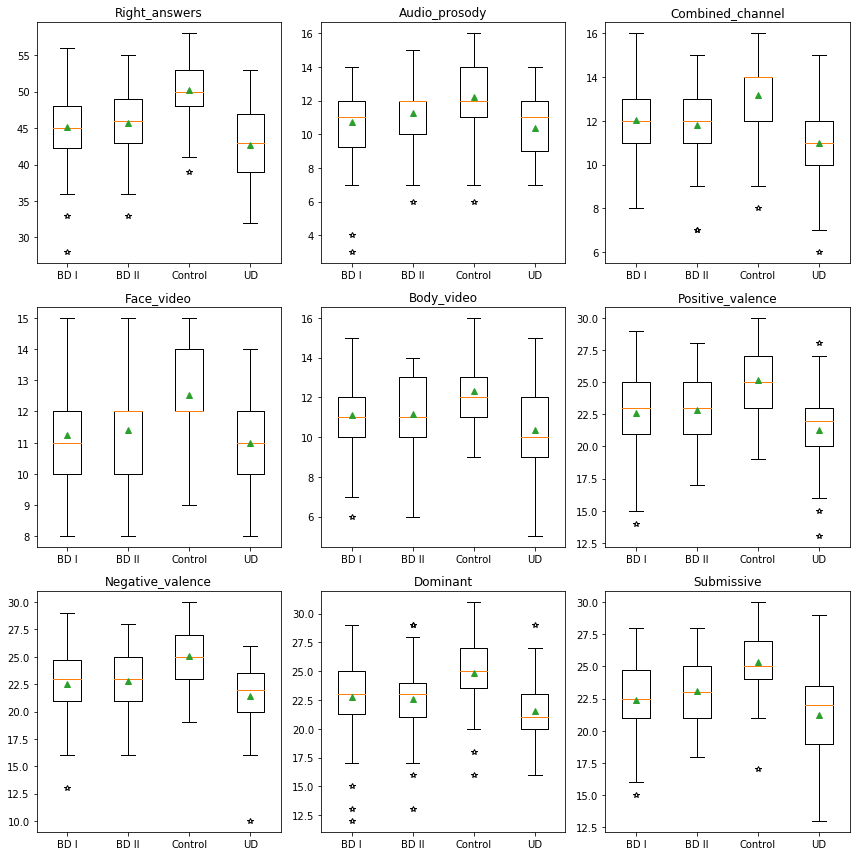

In [35]:
# new-ish things to learn: creating functions to produce multiple identically formatted plots
# practice again: adding subplots in a loop

plot_vars = list(df.columns[3:-1]) #the column names of the variables we want to plot
#print(dep_vars)
fig, axs = plt.subplots(3,3, sharex=False, sharey=False, figsize=(12,12))

def draw_boxplot_as_subplot(ax, plot_var):
    plot_var_values = []
    for iType in df.Type.unique():
        plot_var_values.append(df[df.Type==iType][plot_var].values) # it becomes a list of arrays
    ax.boxplot(plot_var_values, sym = '*', showmeans = True)
    ax.set_title(plot_var)
    ax.set_xticklabels(df.Type.unique())

for ax, plot_var in zip(axs.ravel(), plot_vars):
    draw_boxplot_as_subplot(ax, plot_var) #call the function for each variable
    
plt.tight_layout()
fig.savefig('MiniPONS_by_group.pdf')

## Task 5: Does age play a role?

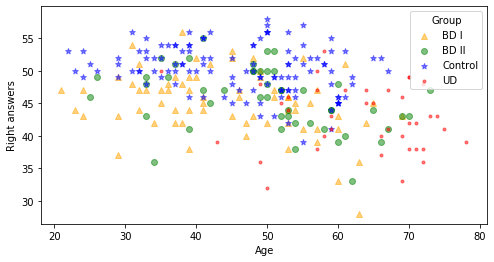

In [36]:
# new-ish things to learn: markers and color for plotting additional variables
# practice again: looping with multiple identifiers
fig, ax = plt.subplots(figsize = (8,4))
for iType, marker, color in zip(df.Type.unique(), ['^', 'o', '*', '.'], ['orange', 'green', 'blue', 'red']):
    plt.scatter(df[df.Type == iType].Age, df[df.Type == iType].Right_answers, marker=marker, color = color, alpha = 0.5, label=iType)
plt.xlabel('Age')
plt.ylabel('Right answers')
plt.legend(loc = 'best', title = 'Group')

plt.show()

## Task 6: 3D plots 💥

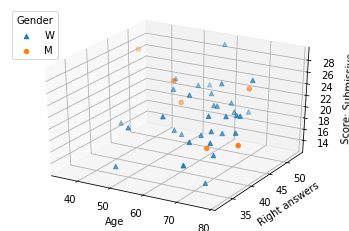

In [37]:
# 3d plot: right answers, by age
from mpl_toolkits.mplot3d import Axes3D

fig3d = plt.figure()
ax3d = fig3d.add_subplot(111, projection='3d')
for gender, marker in zip(df.Gender.unique(), ['^', 'o']):
    gender_UD_data = df[(df.Type == 'UD') & (df.Gender == gender)]
    ax3d.scatter(gender_UD_data.Age, gender_UD_data.Right_answers, gender_UD_data.Submissive, marker = marker, label = gender)

ax3d.set_xlabel('Age')
ax3d.set_ylabel('Right answers')
ax3d.set_zlabel('Score: Submissive')
ax3d.legend(loc = 'upper left', title = 'Gender')

plt.show()